## Summary of Findings

- Females Have higher chances of survival
- First class passengers have higher survival chances
- Most Passengers from Cherbourg station were first class so Cherbourg Passengers have higehr survival chances
- Younger people have higher chances of survival (i.e. babies, children, and teens)
- Passengers' travel company and size has an impact on survival rates:
    - People travelling with other people generally had higher chances of survival
	- People travelling in small families (max of 4 siblings, spouses, children, and parents) had higher survival chances
	compared to people travelling alone or in larger groups
	
- Most people with unkown cabins are 3rd class passengers,so they have lower chnaces of survival.
- Some Cabin Categories seemed to provide better chances of survival 
	- Some of the cabin categories are characterized by having 1st Class passengers 
- People who paid higher fares tend to have higher chances of survival as they are charazterized by being of higher class
- Some Titles are associated with higher survival rates
- Tickets have a prefix part and a numbe part. Some Ticket prefixes are associated with higher chances of survival.

## Things To-Do

- To reuse the helper functions:
    - Add them to a .py file and import it later to reuse
	- Add the helper functions files to a directory that will be referred to from all othe projects

- For Describe2 function:
    - Add a parameter to indicate whether the output shall be count or percentage or both
    - Add a parameter to indicate whether the nans shall be taken into consideration for the analysis or not (eg. Median, Mode, etc)

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
from scipy import stats
import re
import math
import string
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Global Variables

In [3]:
data_folder_name = 'Data'
raw_data_folder_name = 'Raw_Data'
processed_data_folder_name = 'Processed_Data'
train_csv_name = 'train.csv'
test_csv_name = 'test.csv'
processed_csv_name = 'titanic_train_data_processed.csv'

## File paths

In [4]:
project_path = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
data_folder = os.path.join(project_path,data_folder_name)
raw_data_path = os.path.join(data_folder,raw_data_folder_name)
processed_data_path = os.path.join(data_folder,processed_data_folder_name)
train_data_path = os.path.join(raw_data_path,train_csv_name)
test_data_path = os.path.join(raw_data_path,test_csv_name)
processed_data_path = os.path.join(processed_data_path,processed_csv_name)

## Helper Functions

In [9]:
#------------------------------------Describing---------------------------
#------------------------------------Shape Summary---------------------------
def data_shape_summary(labels, catetogical_cols, numeric_cols):
    shape = train_data.shape 
    m = shape[0]
    n = shape[1] - 1 #n-1 because one of the columns is the desired label
    df_shape_ratio = m/n 
    print("The data has:\n", m, 'records\n', n+1, 'columns\n')

    len_labels = len(labels)
    len_cat = len(catetogical_cols)
    len_num = len(numeric_cols)
    
    labels =', '.join(labels)
    catetogical_cols = ', '.join(catetogical_cols)
    numeric_cols = ', '.join(numeric_cols)
    print("Including:\n {} label/s:\n\t{}\n {} categorical columns:\n\t{}\n {} numeric columns:\n\t{}".format(len_labels, labels, len_cat, catetogical_cols, len_num, numeric_cols))
     
#-------------------------------------Uniqueness Analysis------------------------------------
def unique_identifiers(train_data):
    dic = dict()

    for column in train_data.columns:
        column_uniqueness = train_data[column].nunique()
        dic[column] =column_uniqueness

    uniques_df = pd.DataFrame(pd.Series(dic).sort_values(ascending=False), columns={'#unique'})
    uniques_df['%unique'] = round((uniques_df['#unique']/m)*100,2)
    uniques_df['unique_identifier_flag'] = uniques_df['%unique'].apply(lambda x:'Y' if x ==100.0 else ('N' if x == 0.0 else 'N/A') )
    
    unique_ids = uniques_df[uniques_df['unique_identifier_flag'] == 'Y'].index
    No_unique_ids = uniques_df[uniques_df['unique_identifier_flag'] == 'N'].index
    
    unique_ids = ', '.join(unique_ids)
    No_unique_ids = ', '.join(No_unique_ids)
    print("The data has:\n {} columns with 100% uniqueness:\n\t{}\n\n {} columns with 0% uniqueness:\n\t{}".format(len(unique_ids),unique_ids,len(No_unique_ids),No_unique_ids ))
    return uniques_df

#---------------------------------Nulls Analysis----------------------------------------
def return_null_levels(null_percentage):
    null_percentage = math.ceil(null_percentage)
    if null_percentage >= 20 and null_percentage < 30:
        return 'Moderate Low'
    elif null_percentage >= 30 and null_percentage < 50:
        return 'Medium'
    elif null_percentage >=50:
        return 'Very High'
    elif null_percentage == 0:
        return 'No Nulls'
    else:
        return 'Very Low'
    
def null_analysis(train_data):
    nulls_df = pd.DataFrame((train_data.isnull().sum()).sort_values(ascending=False), columns={'#nulls'})
    nulls_df['%nulls'] = round(nulls_df['#nulls']/m*100,2)
    nulls_df['nulls_lvl'] = nulls_df['%nulls'].apply(lambda x: return_null_levels(x))
    
    very_low_nulls =  nulls_df[nulls_df['nulls_lvl'] == 'Very Low'].index
    low_nulls =  nulls_df[nulls_df['nulls_lvl'] == 'Moderate Low'].index
    mid_nulls =  nulls_df[nulls_df['nulls_lvl'] == 'Medium'].index
    high_nulls =  nulls_df[nulls_df['nulls_lvl'] == 'Very High'].index
    
    very_low_nulls_str = ', '.join(very_low_nulls)
    low_nulls_str=', '.join(low_nulls)
    mid_nulls_str=', '.join(mid_nulls)
    high_nulls_str=', '.join(high_nulls)
    
    if len(high_nulls) != 0 :
        print('{} Column(s) have a very high number of null records:\n\t{}'.format(len(high_nulls),high_nulls_str))
    if len(mid_nulls) != 0 :
        print('{} Column(s) have a moderate number of null records\n\t{}'.format(len(mid_nulls),mid_nulls_str))    
    if len(low_nulls) != 0 :
        print('{} Column(s) have a moderately low number of null records\n\t{}'.format(len(low_nulls),low_nulls_str))    
    if len(very_low_nulls) != 0 :
        print('{} Column(s) have very few null records\n\t{}'.format(len(very_low_nulls),very_low_nulls_str))             
    
    return nulls_df

#-------------------------------Numeric Describe2--------------------------------
def desc_IQR(df):
    desc_df = pd.DataFrame(df.describe())
    iqr_series = desc_df.loc['75%'] - desc_df.loc['25%']
    frame = {'IQR': iqr_series}
    desc_df = desc_df.append(pd.DataFrame(frame).T)
    
    min_thresh = desc_df.loc['25%'] - 1.5*desc_df.loc['IQR']
    max_thresh = desc_df.loc['75%'] + 1.5*desc_df.loc['IQR']

    frame = {'min_IQR_thresh':min_thresh, 'max_IQR_thresh':max_thresh}
    desc_df = desc_df.append(pd.DataFrame(frame).T)

    return desc_df.loc['IQR':]

def desc_IQR_Outliers(df, desc_IQR):
    IQR_outliers_df = pd.DataFrame((df<desc_IQR.loc['min_IQR_thresh']).sum() + (df>desc_IQR.loc['max_IQR_thresh']).sum(), columns={'#Outliers'} )
    IQR_outliers_df['%Outliers'] = round((IQR_outliers_df['#Outliers']/m*100),2)
    return IQR_outliers_df

def numeric_desc(df):  #what is density?
    df = df.select_dtypes(include=[np.number])
    unique_identifier_cols = df.columns[df.columns.isin(unique_identifiers_list)]
    NoNunique_identifier_cols = df.columns[~df.columns.isin(unique_identifiers_list)]
    desc = pd.DataFrame()
    desc['Type'] = df.dtypes
    #desc['Density'] = np.nan
    desc['No. of Values'] = df.count()
    desc['No. of Unique Values'] = df.nunique(dropna=False) # taking nans into consideration
    desc['No. of NaN'] = df.apply(np.isnan, axis=1).sum()
    desc['No. of Zeros'] = len(df)- np.count_nonzero(df, axis=0)
    desc['No. of +ve Values'] = df.apply(lambda x: x>0).sum()
    desc['Min'] = df.min()
    desc['Max'] = df.max()
    desc['Mean'] = df.mean()
    desc['Std'] = df.std()
    desc['Median'] = df.median(skipna=False) # taking nans into consideration  this is the part that can be parametertized
    desc['Mode'] = df[NoNunique_identifier_cols].mode().T #remove the columns that have 100% uniqueness
    desc['Skew'] = df.skew()
    desc['Kurtosis'] = df.kurtosis() #-ve >> left tailed dist // +ve >> right tailed //0 >>normal dist
    #desc['No. of 3 Sigma Outliers'] = (np.abs(stats.zscore(df,nan_policy='omit')) > 3).sum(axis=0) #omitting nans to match describe2
    desc['No. of IQR Outliers'] = desc_IQR_Outliers(df, desc_IQR(df))['#Outliers']
    
    return desc
#----------------------------------Object Describe2-----------------------------
def object_desc(df):  #what is density?
    df = df.select_dtypes(include=[np.object])
    desc = pd.DataFrame(index=df.columns)
    desc['Type'] = df.dtypes
    #desc['Density'] = np.nan
    desc['No. of Values'] = df.count() #non na values
    desc['No. of Unique Values'] = df.nunique(dropna=False) # taking nans into consideration
    desc['No. of NaN'] = df.isnull().sum()
    return desc

def desc(df):
    nums =  numeric_desc(df)
    obj =   object_desc(df)
    return nums,obj  
#---------------------------------------------------------------
#------------------------------------Plotting---------------------------
#---------------------------------------------------------------
def colors_list(unique_list):
    length = len(unique_list)
    colors_list = ['orange']
    colors_list.extend(['blue']*(length-1))
    return colors_list

#---------------------------------------------------------------

def colors_list_sorted(train_data_copy,var_name,var_unique_list):
    train_data_copy = train_data_copy.set_index(var_name)
    means_index_sorted = pd.DataFrame(train_data_copy.groupby(level=0)['Survived'].mean()).sort_values(by='Survived',ascending=False)
    colors_listed = colors_list(var_unique_list)
    colors_df = pd.DataFrame(index = means_index_sorted.index, data= {'colors': colors_listed})
    colors_df = colors_df.sort_index()
    return list(colors_df.sort_index()['colors'])

#---------------------------------------------------------------

# def variable_mean_survival(var_name):
#     train_data_copy = train_data[~train_data[var_name].isna()]
#     train_data_copy['Survived'] =  train_data_copy['Survived'].astype(int)
#     if train_data_copy[var_name].dtype.name != 'category':
#         var_unique_list = sorted(list(train_data_copy[var_name].unique())) 
#     else:
#         var_unique_list = list(train_data[var_name].dtype.categories)
#     countPerVarValue = pd.DataFrame(train_data_copy.groupby(var_name)['PassengerId'].count(),index = var_unique_list)['PassengerId'] 
#     avg_survival = pd.DataFrame(train_data_copy.set_index(var_name).groupby(level=0)['Survived'].mean(),index = var_unique_list)['Survived']

#     colors_map = colors_list_sorted(train_data_copy,var_name,var_unique_list)
                                      
#     return var_unique_list, countPerVarValue, avg_survival, colors_map
def variable_mean_survival(var_name):
    output_df = pd.DataFrame()
    train_data_copy = train_data[~train_data[var_name].isna()]
    train_data_copy['Survived'] =  train_data_copy['Survived'].astype(int)
    if train_data_copy[var_name].dtype.name != 'category':
        var_unique_list = sorted(list(train_data_copy[var_name].unique())) 
    else:
        var_unique_list = list(train_data[var_name].dtype.categories)
    countPerVarValue = pd.DataFrame(train_data_copy.groupby(var_name)['PassengerId'].count(),index = var_unique_list)['PassengerId'] 
    avg_survival = pd.DataFrame(train_data_copy.set_index(var_name).groupby(level=0)['Survived'].mean(),index = var_unique_list)['Survived']

    colors_map = colors_list_sorted(train_data_copy,var_name,var_unique_list)
    output_df['var_unique_list'] = var_unique_list
    output_df.set_index('var_unique_list', inplace=True)
    output_df['countPerVarValue'] = countPerVarValue
    output_df['avg_survival'] = avg_survival
    output_df['colors_map'] = colors_map
    #return var_unique_list, countPerVarValue, avg_survival, colors_map
    return output_df
#---------------------------------------------------------------

def variable_mean_survival_sorted_survival(var_name):
    train_data_copy = train_data[~train_data[var_name].isna()]
    train_data_copy['Survived'] =  train_data_copy['Survived'].astype(int)
    var_unique_list = sorted(list(train_data_copy[var_name].unique())) 

    countPerVarValue = pd.DataFrame(train_data_copy.groupby(var_name)['PassengerId'].count(),index = var_unique_list)['PassengerId'] 
    avg_survival = pd.DataFrame(train_data_copy.set_index(var_name).groupby(level=0)['Survived'].mean(),index = var_unique_list)['Survived']
    avg_survival = round(avg_survival,2)
    colors_map = colors_list_sorted(train_data_copy,var_name,var_unique_list)
    
    df = pd.concat([countPerVarValue,avg_survival], axis=1).rename(columns={'PassengerId':'countPerVarValue','Survived':'avg_survival'}).sort_values(by='avg_survival')

    return df

#---------------------------------------------------------------

def variable_mean_survival_subset(df,var_name):
    train_data_copy = df[~train_data[var_name].isna()]
    train_data_copy['Survived'] =  train_data_copy['Survived'].astype(int)
    var_unique_list = sorted(list(train_data_copy[var_name].unique()))     
    countPerVarValue = pd.DataFrame(train_data_copy.groupby(var_name)['PassengerId'].count(),index = var_unique_list)['PassengerId'] 
    avg_survival = pd.DataFrame(train_data_copy.set_index(var_name).groupby(level=0)['Survived'].mean(),index = var_unique_list)['Survived']

    colors_map = colors_list_sorted(train_data_copy,var_name,var_unique_list)
                                      
    return var_unique_list, countPerVarValue, avg_survival, colors_map

#---------------------------------------------------------------

def plt_settings(cur_plt, ititle):
    ax = cur_plt.gca()
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    #ax.get_yaxis().set_visible(False)  
    ax.set_yticklabels([])
    plt.title(ititle)
    for i, rect in enumerate(ax.patches):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,  str(round(height, 2)),
                ha='center', va='bottom')  
#---------------------------------------------------------------

def plt_simple_settings(cur_plt, ititle):
    ax = cur_plt.gca()
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    #ax.get_yaxis().set_visible(False)  
    #ax.set_yticklabels([])
    plt.title(ititle)
    #for i, rect in enumerate(ax.patches):
     #   height = rect.get_height()
     #   ax.text(rect.get_x() + rect.get_width() / 2, height,  str(round(height, 2)),
     #           ha='center', va='bottom')        

#---------------------------------------------------------------

def remove_top_right_spines(cur_plt):
    ax = cur_plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
#---------------------------------------------------------------

def setup_legends(colors_dict, plt):
    labels = list(colors_dict.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors_dict[label]) for label in labels]
    plt.subplot(1, 3, 2)
    plt_settings(plt,'')
    plt.gca().get_xaxis().set_visible(False)  
    plt.legend(handles, labels);   
    
    
    

## Loading the data

In [6]:
raw_data_train = pd.read_csv(train_data_path)

train_data = raw_data_train.copy()

# Exploratory Data Analysis

### Shape of Data

In [7]:
labels = ['Survived']
catetogical_cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numeric_cols = ['PassengerId',  'Age', 'SibSp', 'Parch','Fare']

shape = train_data.shape 
m = shape[0]
n = shape[1] - 1 #n-1 because one of the columns is the desired label
df_shape_ratio = m/n 
    
data_shape_summary(labels, catetogical_cols, numeric_cols)    

The data has:
 891 records
 12 columns

Including:
 1 label/s:
	Survived
 7 categorical columns:
	Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked
 5 numeric columns:
	PassengerId, Age, SibSp, Parch, Fare


In [8]:
for col in catetogical_cols:
    if raw_data_train[col].dtypes != 'O':
        train_data[col] = train_data[col].astype('str') 

### Full Row Duplication

In [11]:
cnt_full_row_dup = sum(train_data.duplicated())
print("The data has ",cnt_full_row_dup, 'full row duplications')

The data has  0 full row duplications


### Nulls In Data

In [12]:
#print statements for nulls : >20% - <30% nulls, 30%-50%  , >50%
nulls_df = null_analysis(train_data)
nulls_df

1 Column(s) have a very high number of null records:
	Cabin
1 Column(s) have a moderately low number of null records
	Age
1 Column(s) have very few null records
	Embarked


,#nulls,%nulls,nulls_lvl
Cabin,687,77.10,Very High
Age,177,19.87,Moderate Low
Embarked,2,0.22,Very Low
Fare,0,0.00,No Nulls
Ticket,0,0.00,No Nulls
Parch,0,0.00,No Nulls
SibSp,0,0.00,No Nulls
Sex,0,0.00,No Nulls
Name,0,0.00,No Nulls
Pclass,0,0.00,No Nulls


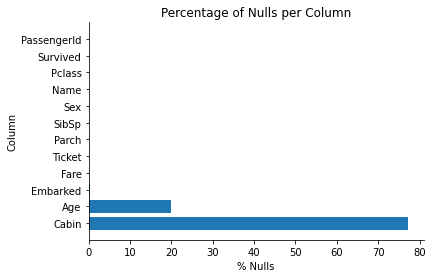

In [13]:
plt.figure()   ## this should plot %nulls not #nulls
plt.barh(nulls_df.index, width=nulls_df['%nulls'])
remove_top_right_spines(plt)
plt.title('Percentage of Nulls per Column');
plt.ylabel('Column')
plt.xlabel('% Nulls');

### Uniqueness of Data

In [14]:
#unique_identifiers fn should return the df and the names of the 100% and 0 % uniqueness
uniques_df = unique_identifiers(train_data)
unique_identifiers_list = list(uniques_df[uniques_df['unique_identifier_flag']=='Y'].index)
uniques_df

The data has:
 17 columns with 100% uniqueness:
	Name, PassengerId

 0 columns with 0% uniqueness:
	


,#unique,%unique,unique_identifier_flag
Name,891,100.00,Y
PassengerId,891,100.00,Y
Ticket,681,76.43,N/A
Fare,248,27.83,N/A
Cabin,147,16.50,N/A
Age,88,9.88,N/A
Parch,7,0.79,N/A
SibSp,7,0.79,N/A
Embarked,3,0.34,N/A
Pclass,3,0.34,N/A


## Statistical Summary Tables

In [15]:
numeric_desc_df = desc(train_data)[0]  
numeric_desc_df

,Type,No. of Values,No. of Unique Values,No. of NaN,No. of Zeros,No. of +ve Values,Min,Max,Mean,Std,Median,Mode,Skew,Kurtosis,No. of IQR Outliers
PassengerId,int64,891,891,0,0,891,1.00,891.0000,446.000000,257.353842,446.0000,NaN,0.000000,-1.200000,0
Age,float64,714,89,177,0,714,0.42,80.0000,29.699118,14.526497,NaN,24.00,0.389108,0.178274,11
SibSp,int64,891,7,0,608,283,0.00,8.0000,0.523008,1.102743,0.0000,0.00,3.695352,17.880420,46
Parch,int64,891,7,0,678,213,0.00,6.0000,0.381594,0.806057,0.0000,0.00,2.749117,9.778125,213
Fare,float64,891,248,0,15,876,0.00,512.3292,32.204208,49.693429,14.4542,8.05,4.787317,33.398141,116


In [16]:
cat_desc_df = desc(train_data)[1]  
cat_desc_df

,Type,No. of Values,No. of Unique Values,No. of NaN
Survived,object,891,2,0
Pclass,object,891,3,0
Name,object,891,891,0
Sex,object,891,2,0
Ticket,object,891,681,0
Cabin,object,204,148,687
Embarked,object,889,4,2


# Exploring Key Survival Drivers

## What is the relation between Gender and Survival?

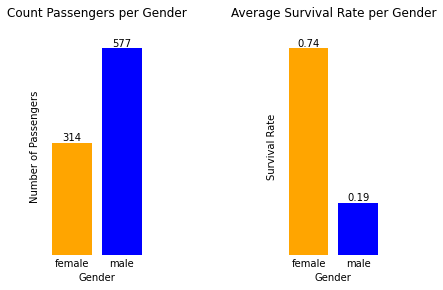

In [15]:
analysis_df = variable_mean_survival('Sex')

unique_sexes =  analysis_df.index
sex_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']

fig = plt.figure()

plt.subplot(1, 3, 1)
plt.bar(unique_sexes,sex_value_count,color=colors_map)
plt_settings(plt,'Count Passengers per Gender\n')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')

plt.subplot(1, 3, 3)
plt.bar(unique_sexes,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate per Gender\n')
plt.xlabel('Gender')
plt.ylabel('Survival Rate');

**Key Takeaway: Females have higher survival rates**

### What is the relation between Passenger's Class and Survival?

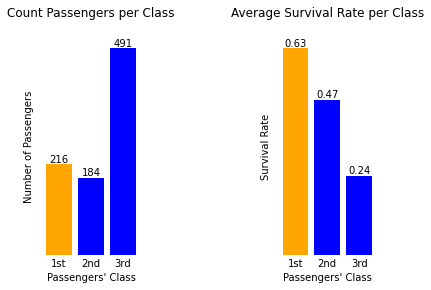

In [16]:
analysis_df = variable_mean_survival('Pclass')

unique_class =  analysis_df.index
class_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']

plt.subplot(1, 3, 1)
plt.bar(unique_class,class_value_count,color=colors_map)
plt_settings(plt,'Count Passengers per Class\n')
plt.xticks(ticks=['1','2','3'],labels= ['1st','2nd', '3rd']);
plt.xlabel("Passengers' Class")
plt.ylabel('Number of Passengers')

plt.subplot(1, 3, 3)
plt.bar(unique_class,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate per Class\n')
plt.xticks(ticks=['1','2','3'],labels= ['1st','2nd', '3rd']);
plt.xlabel("Passengers' Class")
plt.ylabel('Survival Rate');

**Key Takeaway: 1st class passengers have higher survival rates**

## What is the relation between Boarding Station and Survival? 

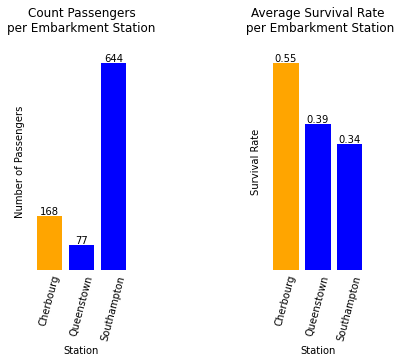

In [17]:
analysis_df = variable_mean_survival('Embarked')

unique_embark =  analysis_df.index
embark_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']


plt.subplot(1, 3, 1)
plt.bar(unique_embark,embark_value_count,color=colors_map)
plt_settings(plt,'Count Passengers\nper Embarkment Station\n')
plt.xticks(ticks=['C','Q','S'],labels= ['Cherbourg','Queenstown', 'Southampton'], rotation = 75);
plt.xlabel('Station')
plt.ylabel('Number of Passengers')

plt.subplot(1, 3, 3)
plt.bar(unique_embark,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\n per Embarkment Station\n')
plt.xticks(ticks=['C','Q','S'],labels= ['Cherbourg','Queenstown', 'Southampton'], rotation = 75);
plt.xlabel('Station')
plt.ylabel('Survival Rate');

**Key Takeaway: Passengers who departed from Cherbourg have higher survival rates**

### What is the nature of passengers who embarked from Cherbourg? (Pclass & Gender)
Since by now we know that Gender and Class have high impact on survival rates, these 2 features will be explored here in relation to Cherbourg station to try and explain why this station had such a high impact on survival rates

Passengers from Cherbourg were predominantly First Class
 which explains why they have higher survival chances


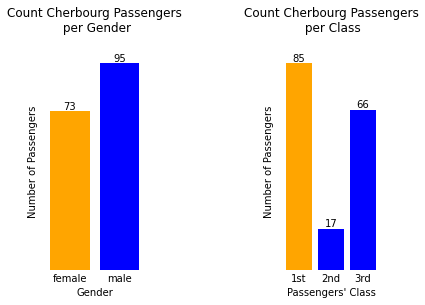

In [18]:
c_df = train_data[train_data['Embarked'] == 'C'][['PassengerId','Sex', 'Pclass', 'Survived']]
unique_sex,sex_value_count, avg_survival,colors_map = variable_mean_survival_subset(c_df,'Sex')

plt.subplot(1, 3, 1)
plt.bar(unique_sex,sex_value_count,color=colors_map)
plt_settings(plt,'Count Cherbourg Passengers\n per Gender\n')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers');

unique_class,class_value_count, avg_survival,colors_map = variable_mean_survival_subset(c_df,'Pclass')
plt.subplot(1, 3, 3)
plt.bar(unique_class,class_value_count,color=colors_map)
plt_settings(plt,'Count Cherbourg Passengers\n per Class\n')
plt.xticks(ticks=[0,1,2],labels= ['1st','2nd', '3rd']);
plt.xlabel("Passengers' Class")
plt.ylabel('Number of Passengers');

print('\033[1m'+'Passengers from Cherbourg were predominantly First Class\n which explains why they have higher survival chances'+'\033[1m')

**Key Takeaway: Passengers who departed from Cherbourg are mostly 1st class passengers which explains them having higher survival rates**

## What is the relation between the passenger's Travel Company Size and Survival?
We will analyse siblings, spouses, children, and parents travelling with the passenger

Combine SibSp and Parch in one column indicating size of travel company

In [19]:
def family_flag(x):
    sum_all =  x['SibSp'] + x['Parch']
    if sum_all == 0 :
        return 'Alone'
    elif sum_all < 4:
        return 'Small Family'
    else:
        return 'Big Family'

In [20]:
train_data['Family_flag']  = train_data.apply(family_flag, axis=1)

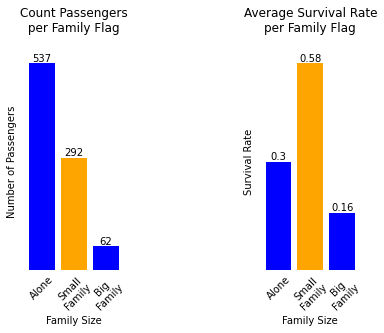

In [21]:
# reorder the x asis
analysis_df = variable_mean_survival('Family_flag')
analysis_df = analysis_df.reindex(['Alone', 'Small Family', 'Big Family'])

unique_famFlag =  analysis_df.index
famFlag_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']

plt.subplot(1,3,1) 
plt.bar(list(map(str,unique_famFlag)), famFlag_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\n per Family Flag \n')
plt.xticks(ticks=[0,1,2],labels=['Alone','Small\nFamily', 'Big\nFamily'],  rotation = 45);
plt.xlabel("Family Size")
plt.ylabel('Number of Passengers')

plt.subplot(1, 3, 3)
plt.bar(list(map(str,unique_famFlag)),avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper Family Flag\n')
plt.xticks(ticks=[0,1,2],labels=['Alone','Small\nFamily', 'Big\nFamily'],  rotation = 45);
plt.xlabel("Family Size")
plt.ylabel('Survival Rate');

**Key Takeaway: People travelling in small families have higher survival rates**

## What is the relation between passengers' Age and Survival?

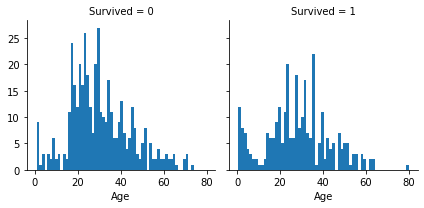

In [22]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=60)

### What is the relation between Age Group and Survival?

In [23]:
bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train_data.Age, bins, labels = labels)
train_data['Age_Group'] = age_groups

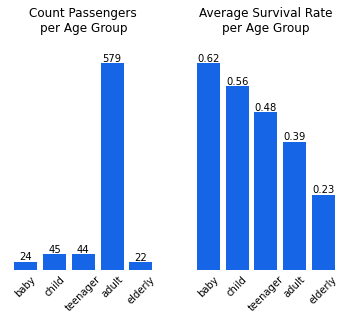

In [24]:
analysis_df = variable_mean_survival('Age_Group')
unique_ageGroup =  analysis_df.index
ageGroup_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']

plt.subplot(1,2,1) 
plt.bar(unique_ageGroup, ageGroup_value_count, color='#1565e6') #'#0948ad'
plt_settings(plt,'Count Passengers\nper Age Group\n')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(unique_ageGroup,avg_survival,color='#1565e6')
plt_settings(plt,'Average Survival Rate\nper Age Group\n')
plt.xticks(rotation=45);

**Key Takeaway: Younger people have higher survival rates**

### What are the chances of survival of children with parents vs without parents?

In [25]:
df = train_data[train_data['Age_Group'].isin(['baby','child'])]
unique_vals = df['Age_Group'].unique()

df['Survived'] = df['Survived'].astype(int)
df_zeroParents = df[df['Parch']==0]
df_withParents = df[df['Parch']>0]

In [26]:
df_child_parents_analysis = pd.DataFrame(columns={'With_Parents', 'Without_Parents'}, index=['baby','child'])
df_child_parents_analysis.loc['baby']['With_Parents'] = df_withParents[(df_withParents['Age_Group'] == 'baby') & (df_withParents['Parch'] !=0)]['Parch'].count()
df_child_parents_analysis.loc['child']['With_Parents'] = df_withParents[(df_withParents['Age_Group'] == 'child') & (df_withParents['Parch'] !=0)]['Parch'].count()
df_child_parents_analysis.loc['baby']['Without_Parents'] = df_zeroParents[(df_zeroParents['Age_Group'] == 'baby') & (df_zeroParents['Parch'] ==0)]['Parch'].count()
df_child_parents_analysis.loc['child']['Without_Parents'] = df_zeroParents[(df_zeroParents['Age_Group'] == 'child') & (df_zeroParents['Parch'] ==0)]['Parch'].count()

print('\033[1m'+"There are no babies travelling alone without parents, so we can focus our analysis on the child age group"+'\033[1m')
df_child_parents_analysis

There are no babies travelling alone without parents, so we can focus our analysis on the child age group


,Without_Parents,With_Parents
baby,0,24
child,3,42


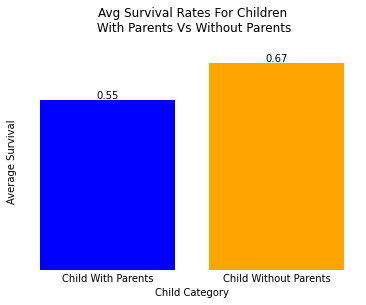

In [27]:
df_zeroParents_child = df_zeroParents[df_zeroParents['Age_Group'] == 'child']
df_withParents_child = df_withParents[df_withParents['Age_Group'] == 'child']

zeroParents_avg_survival = df_zeroParents_child['Survived'].mean()
withParents_avg_survival = df_withParents_child['Survived'].mean()

labels = ['Child With Parents', 'Child Without Parents']
values  = [withParents_avg_survival, zeroParents_avg_survival]
plt.bar(labels, values, color=['blue','orange'])
plt_settings(plt,'Avg Survival Rates For Children\n With Parents Vs Without Parents\n')
plt.xlabel('Child Category')
plt.ylabel('Average Survival');

### What is the relationship between Age and Class?

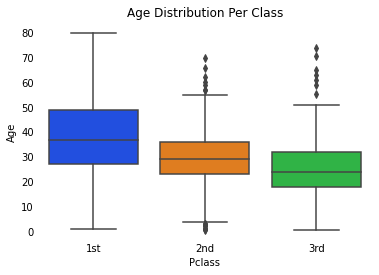

In [28]:
baby = train_data[train_data['Age_Group']=='baby']
child = train_data[train_data['Age_Group']=='child']
teenager = train_data[train_data['Age_Group']=='teenager']
adults = train_data[train_data['Age_Group']=='adult']
elderly = train_data[train_data['Age_Group']=='elderly']

sns.boxplot(x='Pclass',y='Age',data=train_data.sort_values(by='Pclass'), palette='bright')

plt_simple_settings(plt,'Age Distribution Per Class')
plt.yticks();
plt.xticks(ticks=[0,1,2], labels=['1st', '2nd','3rd']);

**Key Takeaway: 1st class paasengers tend to be older than 2nd or 3rd class passengers**

## What is the relationship between Cabin and Survival?

- Following the idea that passengers of no cabin stated (unkown cabins) are of lower classes
- Note: Cabins column is 77% nulls making it difficult to be a reliable source of analysis. Therefore, nulls will be considered a category of their own and part of our analysis

In [29]:
train_data['Cabin_Flag'] = train_data["Cabin"].notnull().astype(int).map({0: 'unkown cabin', 1: 'known cabin'})

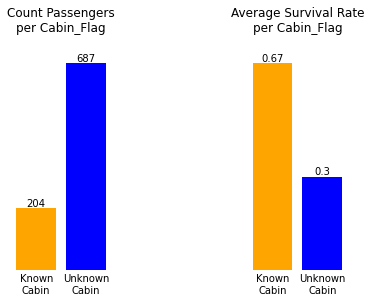

In [30]:
analysis_df = variable_mean_survival('Cabin_Flag')
unique_cabinFlag =  analysis_df.index
cabinFlag_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']

plt.subplot(1,3,1) 
plt.bar(unique_cabinFlag, cabinFlag_value_count, color=colors_map)
plt_settings(plt,'Count Passengers\nper Cabin_Flag\n')
plt.xticks(ticks=[0,1],labels=['Known\nCabin', 'Unknown\nCabin'])

plt.subplot(1, 3, 3)
plt.bar(unique_cabinFlag,avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate\nper Cabin_Flag\n')
plt.xticks(ticks=[0,1],labels=['Known\nCabin', 'Unknown\nCabin']);
 

**Key Takeaway: People with known cabins have higher survival rates**

### What are the characteristics of passengers with known Vs unkown Cabins?
since class and gender are 2 strong predictors, can they be attributed to the observation that people with known cabins having higher survival rates?

#### What is the distribution of passengers of different classes across the known and unkown cabins categories?

In [31]:
train_data['Survived'] = train_data['Survived'].astype(int)
unique_vals = train_data['Cabin_Flag'].unique()

known_cabins_df = train_data[train_data['Cabin_Flag']=='known cabin']
unknown_cabins_df = train_data[train_data['Cabin_Flag']=='unkown cabin']

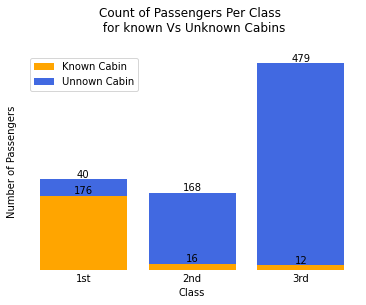

In [32]:
unique_class,class_value_count, avg_survival,colors_map = variable_mean_survival_subset(known_cabins_df,'Pclass')
plt.bar(unique_class, class_value_count, color='orange',label='Known Cabin')

ax = plt.gca()
ax_height=[]
ax_patches = []
for i, rect in enumerate(ax.patches):
        ax_patches.append(rect)
        
        height = rect.get_height()
        
        ax_height.append(height)
        
        ax.text(rect.get_x() + rect.get_width() / 2, height,  str(round(height, 2)),
                ha='center', va='bottom') 


unique_class,unknown_class_value_count, avg_survival,colors_map = variable_mean_survival_subset(unknown_cabins_df,'Pclass')
plt.bar(unique_class, unknown_class_value_count, bottom=class_value_count , color='royalblue',label='Unnown Cabin');

ax2 = plt.gca()
j=0
for i, rect in enumerate(ax2.patches):

    if rect not in ax_patches:
        height = rect.get_height()
        pos = height
        pos += ax_patches[j].get_height()
        j+=1
        ax2.text(rect.get_x() + rect.get_width() / 2, pos,  str(round(height, 2)),
                ha='center', va='bottom') 

        
plt.legend()
plt.xticks(ticks=[0,1,2], labels=['1st','2nd','3rd']);
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
ax.set_yticklabels([])
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Count of Passengers Per Class \n for known Vs Unknown Cabins\n');


**Key Takeaway: People with known cabins ae mostly 1st class which explains them having higher survival rates**

#### What is the distribution of passengers of different genders across the known and unkown cabins categories?

The gender doesn't look like it is related to the imapct of known vs unkown cabins on survival
because males are predominant in both categories


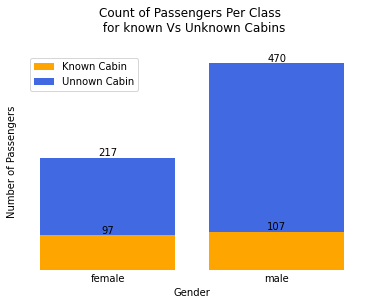

In [33]:
unique_gender,gender_value_count, avg_survival,colors_map = variable_mean_survival_subset(known_cabins_df,'Sex')
plt.bar(unique_gender, gender_value_count, color='orange',label='Known Cabin')

ax = plt.gca()
ax_height=[]
ax_patches = []
for i, rect in enumerate(ax.patches):
        ax_patches.append(rect)
        
        height = rect.get_height()
        
        ax_height.append(height)
        
        ax.text(rect.get_x() + rect.get_width() / 2, height,  str(round(height, 2)),
                ha='center', va='bottom') 


unique_gender,unknown_gender_value_count, avg_survival,colors_map = variable_mean_survival_subset(unknown_cabins_df,'Sex')
plt.bar(unique_gender, unknown_gender_value_count, bottom=gender_value_count , color='royalblue',label='Unnown Cabin');

ax2 = plt.gca()
j=0
for i, rect in enumerate(ax2.patches):

    if rect not in ax_patches:
        height = rect.get_height()
        pos = height
        pos += ax_patches[j].get_height()
        j+=1
        ax2.text(rect.get_x() + rect.get_width() / 2, pos,  str(round(height, 2)),
                ha='center', va='bottom') 

        
plt.legend()
plt.xticks(ticks=[0,1], labels=['female','male']);
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
ax.set_yticklabels([])
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Count of Passengers Per Class \n for known Vs Unknown Cabins\n');
print('\033[1m'+"The gender doesn't look like it is related to the imapct of known vs unkown cabins on survival\nbecause males are predominant in both categories"+'\033[1m')

**The gender doesn't look like it is related to the imapct of known vs unkown cabins on survival
because males are predominant in both categories**

### What is the relationship between the Cabin Category and Survival?
- Cabins are 77% nulls so we will leave Category 'N' to represent unkown cabins
- According to [this link](https://www.encyclopedia-titanica.org/cabins.html) it seems that different cabin categories are associated with more than just one class

In [34]:
train_data['Cabin_Cat'] = train_data['Cabin'].apply(lambda x:str(x)[0].upper())

In [35]:
df = pd.DataFrame(train_data.groupby('Cabin_Cat')['Pclass'].unique())
df['Pclass'] = [','.join(map(str, l)) for l in df['Pclass']]
df

,Pclass
Cabin_Cat,
A,1
B,1
C,1
D,"2,1"
E,"1,2,3"
F,"2,3"
G,3
N,"3,2,1"
T,1


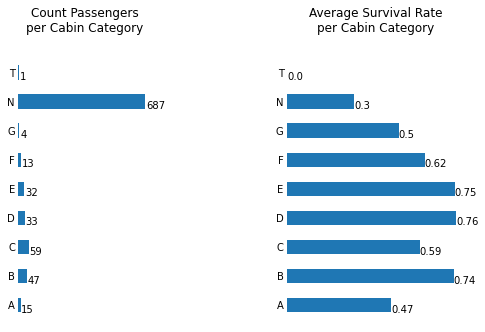

In [36]:
analysis_df = variable_mean_survival('Cabin_Cat')
unique_cabinCat =  analysis_df.index
cabinCat_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']

plt.figure(figsize=(8,5))
gspec = gridspec.GridSpec(24, 50)

plot1 = plt.subplot(gspec[:, :15])
plot1.barh(unique_cabinCat, cabinCat_value_count, height = 0.5)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.get_xaxis().set_visible(False)  
plt.title('Count Passengers\nper Cabin Category\n');
for i, rect in enumerate(ax.patches):
    v =  rect.get_y()
    ax.text( v + rect.get_width(), i-.25 , str(rect.get_width()))
    
plot2 = plt.subplot(gspec[:, 30:]) 
plot2.barh(unique_cabinCat, avg_survival, height = 0.5)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.get_xaxis().set_visible(False)  
plt.title('Average Survival Rate\nper Cabin Category\n');
for i, rect in enumerate(ax.patches):
    v =  rect.get_y()
    width = rect.get_width()
    ax.text(rect.get_width() , i-.25 , str(round(width,2)))    
    

**Key Takeaway: Some cabin categories have higher survival rates**

In [37]:
copy_df = train_data[['PassengerId', 'Cabin_Cat','Pclass']]

cabin_class_df = pd.DataFrame(copy_df.groupby(['Cabin_Cat','Pclass'])['PassengerId'].count()).rename(columns={'PassengerId':'Passengers_count'})
cabin_class_df['Passengers_count'] =  round(cabin_class_df['Passengers_count']/m*100,2)

scaler = MinMaxScaler(feature_range=(1,3))
cabin_class_df['Passengers_count']  = scaler.fit_transform(np.array(cabin_class_df['Passengers_count']).reshape(-1, 1)  )

labels_titles = list(cabin_class_df.index.get_level_values(0).unique())
class1 = cabin_class_df[cabin_class_df.index.get_level_values(1)=='1']
class2 = cabin_class_df[cabin_class_df.index.get_level_values(1)=='2']
class3 = cabin_class_df[cabin_class_df.index.get_level_values(1)=='3']
labels_titles = pd.DataFrame(labels_titles).rename(columns={0:'Cabin_Cat'})
class1 = labels_titles.merge(class1, on ='Cabin_Cat', how='left' )
class2 = labels_titles.merge(class2, on ='Cabin_Cat', how='left' )
class3 = labels_titles.merge(class3, on ='Cabin_Cat', how='left' )

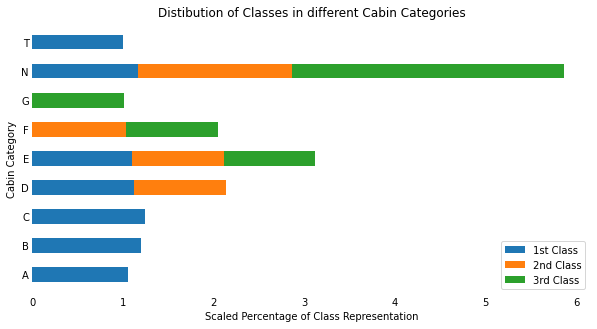

In [38]:
labels_titles = list(cabin_class_df.index.get_level_values(0).unique())
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(labels_titles, class1['Passengers_count'], height = 0.5, label='1st Class')
ax.barh(labels_titles, class2['Passengers_count'], height = 0.5 , left = class1['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x), label='2nd Class')
ax.barh(labels_titles, class3['Passengers_count'], height = 0.5, left = (class1['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x)+class2['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x)) , label='3rd Class')
plt.legend(loc='lower right');
plt.xlabel('Percentage of Class Representation')
plt.ylabel('Cabin Category');
plt_simple_settings(plt, 'Distibution of Classes in different Cabin Categories')


## What is the relationship between Fare and Survival?

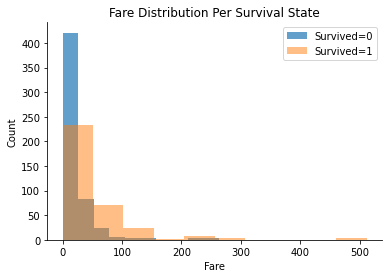

In [39]:
survived_fare = train_data[train_data['Survived']==1]['Fare']
NOsurvived_fare = train_data[train_data['Survived']==0]['Fare']

plt.hist(NOsurvived_fare, label = 'Survived=0', alpha=0.7);
plt.hist(survived_fare, label = 'Survived=1', alpha=0.5);
plt.legend();
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution Per Survival State');

**Key Takeaway: Higher Fares are assoicated with higher survival rates**

### What is the relation between Fare and Class?

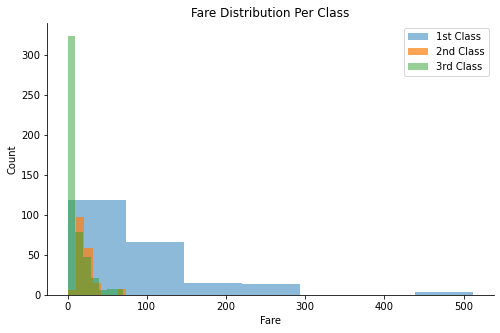

In [40]:
class1_fare = train_data[train_data['Pclass']=='1']['Fare']
class2_fare = train_data[train_data['Pclass']=='2']['Fare']
class3_fare = train_data[train_data['Pclass']=='3']['Fare']

plt.figure(figsize=(8,5))
plt.hist(class1_fare, label = '1st Class', alpha=0.5,bins=7,histtype='stepfilled');
plt.hist(class2_fare, label = '2nd Class', alpha=0.7,bins=7,histtype='stepfilled');
plt.hist(class3_fare, label = '3rd Class', alpha=0.5,bins=7,histtype='stepfilled');

plt.legend()
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution Per Class');

**Key Takeaway: Higher Fares are assoicated with 1st class passengers which explains them having higher survival rates**

## Name - Title Vs Survival

In [41]:
train_data['passenger_title'] = train_data.Name.apply(lambda x: x.split(',',1)[1].split('.')[0].strip()).values

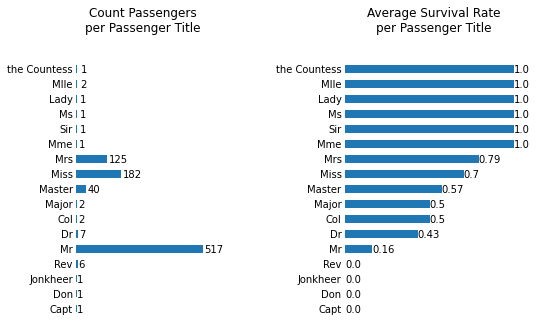

In [42]:
analyses_df = variable_mean_survival_sorted_survival('passenger_title')
unique_title = list(analyses_df.index)
title_value_count = list(analyses_df['countPerVarValue'])
avg_survival = list(analyses_df['avg_survival'])

plt.figure(figsize=(8,5))
gspec = gridspec.GridSpec(24, 50)


plot1 = plt.subplot(gspec[:, :15])
plot1.barh(unique_title, title_value_count, height = 0.5)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.get_xaxis().set_visible(False)  
plt.title('Count Passengers\nper Passenger Title\n');
for i, rect in enumerate(ax.patches):
    v =  rect.get_y()
    ax.text( v + rect.get_width(), i-.25 , str(rect.get_width()))
    
    
    
plot2 = plt.subplot(gspec[:, 30:]) 
   
plot2.barh(unique_title, avg_survival, height = 0.5)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.get_xaxis().set_visible(False)  
plt.title('Average Survival Rate\nper Passenger Title\n');
for i, rect in enumerate(ax.patches):
    v =  rect.get_y()
    width = rect.get_width()
    ax.text(rect.get_width() , i-.25 , str(round(width,2)))

**Key Takeaway: Some titles are assoicated with higher survival rates**

### What is the relationshio between Passengers' Titles and Class?

In [43]:
copy_df = train_data[['PassengerId', 'passenger_title','Pclass']]

title_class_df = pd.DataFrame(copy_df.groupby(['passenger_title','Pclass'])['PassengerId'].count()).rename(columns={'PassengerId':'Passengers_count'})
title_class_df['Passengers_count'] =  round(title_class_df['Passengers_count']/m*100,2)

In [44]:
scaler = MinMaxScaler(feature_range=(0.5,2))
title_class_df['Passengers_count']  = scaler.fit_transform(np.array(title_class_df['Passengers_count']).reshape(-1, 1)  )

In [45]:
labels_titles = list(title_class_df.index.get_level_values(0).unique())
class1 = title_class_df[title_class_df.index.get_level_values(1)=='1']
class2 = title_class_df[title_class_df.index.get_level_values(1)=='2']
class3 = title_class_df[title_class_df.index.get_level_values(1)=='3']
labels_titles = pd.DataFrame(labels_titles).rename(columns={0:'passenger_title'})
class1 = labels_titles.merge(class1, on ='passenger_title', how='left' )
class2 = labels_titles.merge(class2, on ='passenger_title', how='left' )
class3 = labels_titles.merge(class3, on ='passenger_title', how='left' )

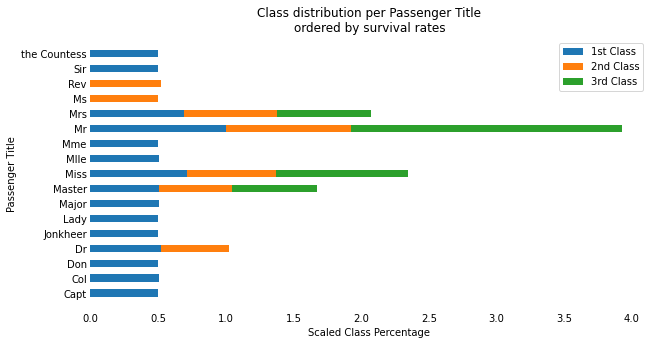

In [62]:
labels_titles = list(title_class_df.index.get_level_values(0).unique())
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(labels_titles, class1['Passengers_count'], height = 0.5, label='1st Class')
ax.barh(labels_titles, class2['Passengers_count'], height = 0.5 , left = class1['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x), label='2nd Class')
ax.barh(labels_titles, class3['Passengers_count'], height = 0.5, left = (class1['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x)+class2['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x)) , label='3rd Class')
plt.legend(loc='upper right');
plt_simple_settings(plt, 'Class distribution per Passenger Title\nordered by survival rates')
plt.ylabel('Passenger Title')
plt.xlabel('Scaled Class Percentage');

### What is the relationship between Ticket and Survival?

- It looks like the Ticket is split into a prefix and a number sometimes and only numbers some other times.
- Followed strategy here is to split the prefix from the number and check their avergae survival rates 

In [47]:
train_data['Tckt_Pre'] = train_data['Ticket'].apply(lambda x: x.rsplit(' ',1)[0]  if len(x.rsplit(' ',1))>1 else np.nan)
train_data['Tckt_Pre'] = train_data['Tckt_Pre'].apply(lambda x: x if pd.isnull(x) else x.translate(str.maketrans('', '', string.punctuation)).replace(" ", ""))
train_data['Tckt_Num'] = train_data['Ticket'].apply(lambda x: x.rsplit(' ',1)[1]  if len(x.rsplit(' ',1))>1 else x.rsplit(' ',1)[0])
train_data['Tckt_Num'] = train_data['Tckt_Num'].apply(lambda x: x if pd.isnull(x) else x.translate(str.maketrans('', '', string.punctuation)))

### What is the relationship between ticket prefix and survival rates?

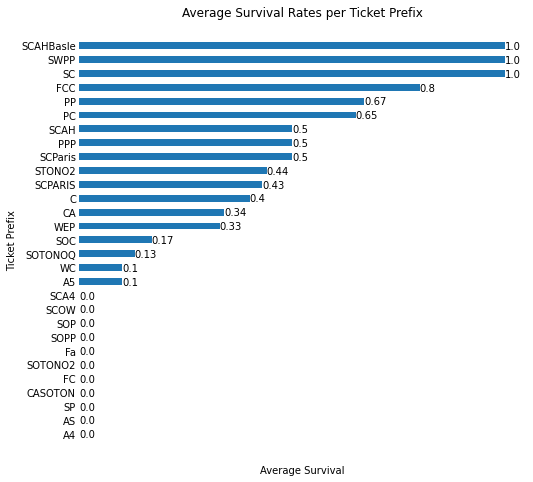

In [48]:
analyses_df = variable_mean_survival_sorted_survival('Tckt_Pre')
unique_TcktPre = list(analyses_df.index)
title_value_count = list(analyses_df['countPerVarValue'])
avg_survival = list(analyses_df['avg_survival'])

plt.figure(figsize=(8,8))
gspec = gridspec.GridSpec(24, 50)
plot1 = plt.subplot(gspec[:, :])

plot1.barh(unique_TcktPre, avg_survival, height = 0.5);

plt.title('Average Survival Rates per Ticket Prefix')
plt.ylabel('Ticket Prefix')
plt.xlabel('Average Survival')
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xticklabels([])
for i, rect in enumerate(ax.patches):
    v =  rect.get_y()
    ax.text(x=rect.get_width(),y=i-.25,s=str(rect.get_width()))

**Key Takeaway: Some Ticket prefixes are assoicated with higher survival rates**

### Which boarding stations are associated with each Ticket Prefix?

In [49]:
copy_df = train_data[['PassengerId', 'Tckt_Pre','Embarked']]

tckt_pre_station_distribustion = pd.DataFrame(copy_df.groupby(['Tckt_Pre','Embarked']).count()).rename(columns={'PassengerId':'Passengers_count'})

In [50]:
labels_TcktPres = list(tckt_pre_station_distribustion.index.get_level_values(0).unique())

analysis_df_s = tckt_pre_station_distribustion[tckt_pre_station_distribustion.index.get_level_values(1) == 'S']
analysis_df_c = tckt_pre_station_distribustion[tckt_pre_station_distribustion.index.get_level_values(1) == 'C']
analysis_df_q = tckt_pre_station_distribustion[tckt_pre_station_distribustion.index.get_level_values(1) == 'Q']
 
labels_TcktPres = pd.DataFrame(labels_TcktPres).rename(columns={0:'Tckt_Pre'})
analysis_df_s = labels_TcktPres.merge(analysis_df_s, on ='Tckt_Pre', how='left' )
analysis_df_c = labels_TcktPres.merge(analysis_df_c, on ='Tckt_Pre', how='left' )
analysis_df_q = labels_TcktPres.merge(analysis_df_q, on ='Tckt_Pre', how='left' )

analysis_df_s = analysis_df_s.set_index('Tckt_Pre').reindex(unique_TcktPre)
analysis_df_c = analysis_df_c.set_index('Tckt_Pre').reindex(unique_TcktPre)
analysis_df_q = analysis_df_q.set_index('Tckt_Pre').reindex(unique_TcktPre)

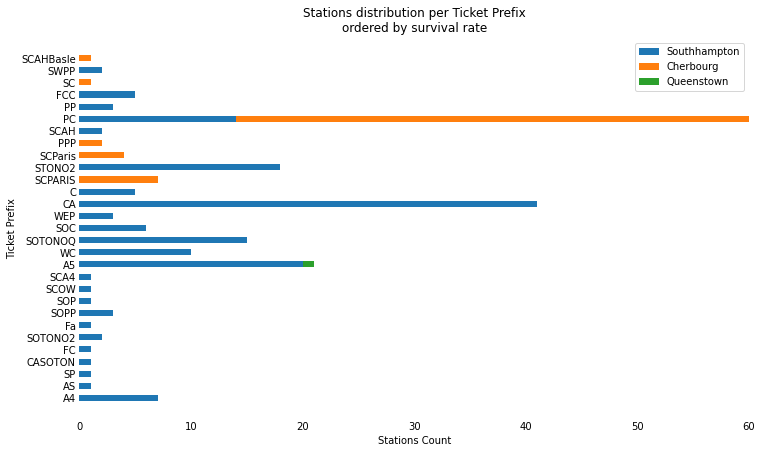

In [64]:
labels_titles = unique_TcktPre
fig, ax = plt.subplots(figsize=(12,7))

ax.barh(labels_titles, analysis_df_s['Passengers_count'], height = 0.5, label='Southhampton')
ax.barh(labels_titles, analysis_df_c['Passengers_count'], height = 0.5 , left = analysis_df_s['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x), label='Cherbourg')
ax.barh(labels_titles, analysis_df_q['Passengers_count'], height = 0.5, left = (analysis_df_s['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x)+analysis_df_c['Passengers_count'].apply(lambda x:0 if pd.isnull(x) else x)) , label='Queenstown')
plt.legend(loc='upper right');
plt_simple_settings(plt, 'Stations distribution per Ticket Prefix\nordered by survival rate')
plt.ylabel('Ticket Prefix')
plt.xlabel('Stations Count');

### What is the relationship between number of passengers on the same ticket and survival rates?

In [52]:
def get_cnt_tckt_passengers(col_val):
    ticket_passenger_cnt_df = pd.DataFrame(train_data.groupby('Ticket')['PassengerId'].count()).rename(columns={'PassengerId':'#Passengers'})
    tckt = col_val
    return ticket_passenger_cnt_df.loc[tckt]['#Passengers']

In [53]:
train_data['Tckt_Passengers_Cnt'] = train_data['Ticket'].apply(lambda x: get_cnt_tckt_passengers(x))
train_data['Tckt_MultiPassengers'] = train_data['Tckt_Passengers_Cnt'].apply(lambda x: 'Multi' if x>1 else 'Alone')

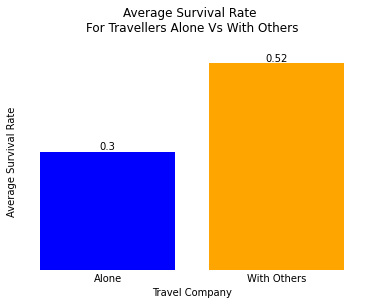

In [55]:
analysis_df = variable_mean_survival('Tckt_MultiPassengers')
unique_value =  analysis_df.index
unique_value_count = analysis_df['countPerVarValue']
avg_survival = analysis_df['avg_survival']
colors_map = analysis_df['colors_map']

plt.bar(list(unique_value),avg_survival,color=colors_map)
plt_settings(plt,'Average Survival Rate \nFor Travellers Alone Vs With Others\n')
plt.xticks(ticks=[0,1], labels=['Alone', 'With Others']);
plt.ylabel('Average Survival Rate');
plt.xlabel('Travel Company');

**Key Takeaway: People Travelling with others have higher survival rates**

At this point, we have two features indicating whether the passenger was travelling alone or with others:
- Family size based on Siblings, Spouses, Parents, and Children columns
- Number of passengers assigned to the same ticket  

**Note that it was found that some passengers can be marked as travelling with others based on the Ticket column, but still have 0's in Siblings, Spouses, Parents, and Children columns. Therefore, a combination of both flags could prove useful.**

# Dealing with Nulls and Missing values

In [56]:
titanic_train_data = train_data.copy()

### Embaked
has only 2 missing values, so they will be dropped

In [57]:
titanic_train_data.dropna(subset=['Embarked'],inplace = True)

### Age
- replace missing ages by avg age of passengers of the same class
- re-categorize passengers into Age Groups after filling missing values

In [58]:
def get_class_avgAge():
    return titanic_train_data.groupby('Pclass')['Age'].mean()

def derive_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return get_class_avgAge()[Pclass]
    else:
        return Age

titanic_train_data['Age'] = titanic_train_data[['Age','Pclass']].apply(derive_age,axis=1)  
titanic_train_data['Age'] = round(titanic_train_data['Age'], 2)

bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(titanic_train_data.Age, bins, labels = labels)
titanic_train_data['Age_Group'] = age_groups
titanic_train_data['Age_Group'] = titanic_train_data['Age_Group'].astype(str)

## Fare
- replace missing fares wih avg class fare 

In [59]:
def get_class_avgFare():
    return titanic_train_data.groupby('Pclass')['Fare'].mean()
    
def derive_Fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        return get_class_avgFare()[Pclass]
    else:
        return Fare   
    
titanic_train_data['Fare'] = titanic_train_data[['Fare','Pclass']].apply(derive_Fare,axis=1)    

## Data types handling
turn categorical data and Flags into str instead of int

In [60]:
titanic_train_data.Pclass = titanic_train_data.Pclass.astype(str)
titanic_train_data.Survived = titanic_train_data.Survived.astype(str)

## Saving Processed Data

In [61]:
titanic_train_data.to_csv(processed_data_path, index=False)